In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class model (nn.Module):
  def __init__(self , in_feature=4, h1=8 , h2=9, out_prediction=3):
    super().__init__()
    self.fc1 = nn.Linear(in_feature , h1)
    self.fc2 = nn.Linear(h1 , h2)
    self.out = nn.Linear(h2 , out_prediction)

  def forward(self , x ):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))
    return x

In [ ]:
torch.manual_seed(41)
model = model()

In [ ]:
import pandas as pd


In [ ]:
url='/content/iris.csv'
data = pd.read_csv(url)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import numpy as np

y = data.loc[:, 'species'].values
x = data.iloc[:, 0:4].values

# Convert y to numeric type before replacing values
y = y.astype(str)  # Ensure y is of type string
y[np.where(y == 'Iris-setosa')] = 0
y[np.where(y == 'Iris-versicolor')] = 1
y[np.where(y == 'Iris-virginica')] = 2
y = y.astype(int) # Convert to integer type





In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain ,ytest = train_test_split(x , y , test_size=0.2 , random_state=41)

In [ ]:
xtrain = torch.FloatTensor(xtrain)
xtest = torch.FloatTensor(xtest)

In [ ]:
ytrain = torch.LongTensor(ytrain)
ytest = torch.LongTensor(ytest)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr=0.01)

In [ ]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(xtrain)
  loss = criterion(y_pred , ytrain)
  losses.append(loss)
  print(f'epoch : {i} , loss : {loss}')

  #back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch : 0 , loss : 1.1251550912857056
epoch : 1 , loss : 1.1095242500305176
epoch : 2 , loss : 1.0960756540298462
epoch : 3 , loss : 1.0845398902893066
epoch : 4 , loss : 1.073915719985962
epoch : 5 , loss : 1.0637413263320923
epoch : 6 , loss : 1.0538722276687622
epoch : 7 , loss : 1.0440350770950317
epoch : 8 , loss : 1.0337213277816772
epoch : 9 , loss : 1.0227365493774414
epoch : 10 , loss : 1.0096259117126465
epoch : 11 , loss : 0.995458722114563
epoch : 12 , loss : 0.9829514026641846
epoch : 13 , loss : 0.9671341776847839
epoch : 14 , loss : 0.9512731432914734
epoch : 15 , loss : 0.9369757771492004
epoch : 16 , loss : 0.9215878248214722
epoch : 17 , loss : 0.9047343134880066
epoch : 18 , loss : 0.8874453902244568
epoch : 19 , loss : 0.8694896697998047
epoch : 20 , loss : 0.8512223958969116
epoch : 21 , loss : 0.8331630229949951
epoch : 22 , loss : 0.8148582577705383
epoch : 23 , loss : 0.7958011031150818
epoch : 24 , loss : 0.7759166359901428
epoch : 25 , loss : 0.755284726619720

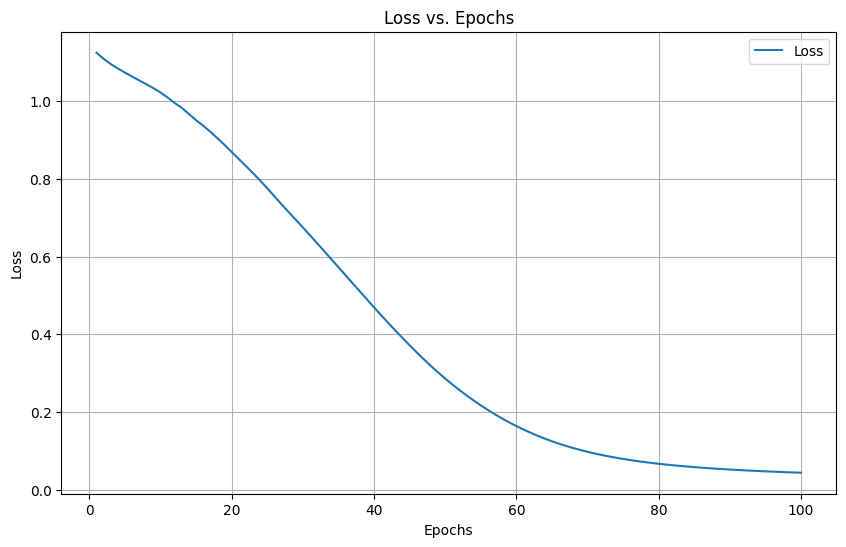

In [ ]:
import matplotlib.pyplot as plt

# Detach loss values and convert to a list
losses = [loss.detach().numpy() for loss in losses]

epochs = range(1, 101)  # 1 to 100

plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate model

#turn off back propagation
with torch.no_grad():
  out_eval = model.forward(xtest)
  loss= criterion(out_eval , ytest)
print(loss)


tensor(0.1296)


In [ ]:
#probeblity of each class
with torch.no_grad():
  for i , data  in enumerate(xtest):
    y_val = model.forward(data)
    print(f'{i+ 1}  ,  {str(y_val)} , \t {ytest[i]}')
    if y_val.argmax().item() == ytest[i]:
      print('correct prediction')
    else:
      print('wrong prediction')

1  ,  tensor([0.0000, 7.4818, 9.9517]) , 	 2
correct prediction
2  ,  tensor([ 0.0000,  7.7416, 14.4150]) , 	 2
correct prediction
3  ,  tensor([ 0.0000,  9.1741, 15.2260]) , 	 2
correct prediction
4  ,  tensor([0.2420, 8.3711, 4.5725]) , 	 1
correct prediction
5  ,  tensor([ 0.0000,  8.4455, 12.5213]) , 	 2
correct prediction
6  ,  tensor([1.6580, 8.0895, 2.0248]) , 	 1
correct prediction
7  ,  tensor([0.0000, 8.1067, 9.3146]) , 	 2
correct prediction
8  ,  tensor([0.3616, 8.4538, 4.3424]) , 	 1
correct prediction
9  ,  tensor([ 0.0000,  8.2779, 10.8831]) , 	 2
correct prediction
10  ,  tensor([ 0.0000,  8.2340, 15.2944]) , 	 2
correct prediction
11  ,  tensor([0.0000, 8.0207, 8.7722]) , 	 2
correct prediction
12  ,  tensor([9.0044, 3.5022, 0.0000]) , 	 0
correct prediction
13  ,  tensor([8.0835, 3.2078, 0.0000]) , 	 0
correct prediction
14  ,  tensor([2.2655, 6.5108, 0.4715]) , 	 1
correct prediction
15  ,  tensor([8.0545, 3.9531, 0.0000]) , 	 0
correct prediction
16  ,  tensor([0.00

In [ ]:
new_iris = torch.tensor([1.45 ,2.43 ,3.32 , 2.32])
with torch.no_grad():
  print(model(new_iris))


tensor([0.0000, 3.6339, 9.6401])
